In [1]:
import os
import sys
mod_path = os.path.abspath(os.path.join('..'))
if mod_path not in sys.path:
    sys.path.append(mod_path)

In [72]:
from pprint import pprint as pp
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [3]:
from tools.feature_format import featureFormat, targetFeatureSplit
from final_project.tester import dump_classifier_and_data

In [4]:
pwd_ = %pwd
pwd_ = Path(pwd_)
pwd_.joinpath('tools/feature_format.py')

WindowsPath('E:/Users/Trenton J. McKinney/PycharmProjects/ud120-projects/tools/feature_format.py')

# Task 1: Select Features
#### features_list is a list of strings, each of which is a feature name.
#### The first feature must be "poi".

In [5]:
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',
                      'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
                      'long_term_incentive', 'restricted_stock', 'director_fees']

email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

poi_label = ['poi']

In [106]:
feature_list = []
feature_list.extend(poi_label)
feature_list.extend(financial_features)
feature_list.extend(email_features)
feature_list

['poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'to_messages',
 'email_address',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi']

In [7]:
len(feature_list)

21

## Load Dataset

In [8]:
# Load the dictionary containing the dataset
with open('final_project/final_project_dataset_unix.pkl', 'rb') as data_file:
    data_dict = pickle.load(data_file)

## Explore Dataset

In [9]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df = df.loc[:,feature_list]
df = df.replace('NaN', np.nan)  # can't use the isnull method with 'NaN'
pd.set_option('max_rows', 150)
pd.set_option('max_columns', 21)
df.head(7)

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,email_address,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,False,201955.0,2869717.0,4484442.0,NaN,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,NaN,2902.0,phillip.allen@enron.com,47.0,2195.0,65.0,1407.0
BADUM JAMES P,False,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,257817.0,3486.0,257817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,477.0,NaN,916197.0,NaN,NaN,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,NaN,1757552.0,NaN,566.0,james.bannantine@enron.com,39.0,29.0,0.0,465.0
BAXTER JOHN C,False,267102.0,1295738.0,5634343.0,NaN,1200000.0,NaN,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,239671.0,260455.0,827696.0,NaN,400000.0,-82782.0,-201641.0,63014.0,129142.0,NaN,69.0,NaN,145796.0,NaN,NaN,frank.bay@enron.com,NaN,NaN,NaN,NaN
BAZELIDES PHILIP J,False,80818.0,684694.0,860136.0,NaN,NaN,NaN,NaN,1599641.0,NaN,1599641.0,874.0,93750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BECK SALLY W,False,231330.0,NaN,969068.0,NaN,700000.0,NaN,NaN,126027.0,37172.0,NaN,566.0,NaN,126027.0,NaN,7315.0,sally.beck@enron.com,144.0,4343.0,386.0,2639.0


In [10]:
df.isnull().sum()

poi                            0
salary                        51
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
exercised_stock_options       44
other                         53
long_term_incentive           80
restricted_stock              36
director_fees                129
to_messages                   60
email_address                 35
from_poi_to_this_person       60
from_messages                 60
from_this_person_to_poi       60
shared_receipt_with_poi       60
dtype: int64

In [11]:
df['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [12]:
list(df.index.values)[:10]

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID']

In [13]:
print(df.loc['LOCKHART EUGENE E'], '\n')
print(df.loc['THE TRAVEL AGENCY IN THE PARK'], '\n')
print(df.loc['TOTAL'])

poi                          False
salary                         NaN
deferral_payments              NaN
total_payments                 NaN
loan_advances                  NaN
bonus                          NaN
restricted_stock_deferred      NaN
deferred_income                NaN
total_stock_value              NaN
expenses                       NaN
exercised_stock_options        NaN
other                          NaN
long_term_incentive            NaN
restricted_stock               NaN
director_fees                  NaN
to_messages                    NaN
email_address                  NaN
from_poi_to_this_person        NaN
from_messages                  NaN
from_this_person_to_poi        NaN
shared_receipt_with_poi        NaN
Name: LOCKHART EUGENE E, dtype: object 

poi                           False
salary                          NaN
deferral_payments               NaN
total_payments               362096
loan_advances                   NaN
bonus                           NaN
restrict

# Task 2: Remove Outliers

## Remove from DataFrame

In [14]:
outlier_keys = ['TOTAL','LOCKHART EUGENE E','THE TRAVEL AGENCY IN THE PARK']
df =df.drop(outlier_keys)

## Remove from DataDict

In [15]:
outliers = ['THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E', 'TOTAL']
for value in outliers:
    del data_dict[value]

# Task 3: Create New Features

## Evaluate Current Features

In [85]:
def select_k_best(features: np.ndarray, labels: list, k: str='all', classifier=f_classif) -> pd.DataFrame:
    """
    Wrapper function for SelectKBest
    input:
        features (np.ndarray)
        labels (list)
        k (int or 'all'): how many features to use
        classifier (function): http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
    """
    feature_selector = SelectKBest(classifier, k)
    feature_selector.fit(features, labels)
    features = feature_selector.transform(features)
    feature_scores = list(zip(feature_list[1:], feature_selector.scores_))
    score_chart_df = pd.DataFrame(feature_scores, columns=['Feature', 'Score'])
    return score_chart_df.sort_values(by=['Score'], ascending=False)

### Feature Selection with DataFrame and SelectKBest

In [84]:
# In order to perform calculations
df = df.replace(np.nan, 0.0)
df['poi'] = df['poi'].replace([False, True], [0.0, 1.0])

features_df = list(df.columns.values)
features_df.remove('poi')
features_df.remove('email_address')

select_k_best(features=df[features_df].values, labels=df['poi'].values)

,Feature,Score
9,exercised_stock_options,24.815080
7,total_stock_value,24.182899
4,bonus,20.792252
0,salary,18.289684
6,deferred_income,11.458477
11,long_term_incentive,9.922186
12,restricted_stock,9.212811
2,total_payments,8.772778
18,shared_receipt_with_poi,8.589421
3,loan_advances,7.184056


### Feature Selection with DataDict and SelectKBest

In [18]:
# Remove categorical features
feature_list.remove('email_address')

# Uses the UDACITY ML Class method of formatting the labels and features
# 'poi' removed inside featureFormat
data = featureFormat(data_dict, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Call selectKbest wrapper
select_k_best(features=features, labels=labels)

,Feature,Score
9,exercised_stock_options,24.815080
7,total_stock_value,24.182899
4,bonus,20.792252
0,salary,18.289684
6,deferred_income,11.458477
11,long_term_incentive,9.922186
12,restricted_stock,9.212811
2,total_payments,8.772778
18,shared_receipt_with_poi,8.589421
3,loan_advances,7.184056


## Engineer New Features

In [86]:
df['ratio_bonus_salary'] = df['bonus']/df['salary']

In [92]:
df = df.replace(np.nan, 0.)
df[['ratio_bonus_salary', 'bonus', 'salary']].head(5)

,ratio_bonus_salary,bonus,salary
ALLEN PHILLIP K,20.672922,4175000.0,201955.0
BADUM JAMES P,0.000000,0.0,0.0
BANNANTINE JAMES M,0.000000,0.0,477.0
BAXTER JOHN C,4.492666,1200000.0,267102.0
BAY FRANKLIN R,1.668955,400000.0,239671.0


In [93]:
df = df.replace(np.nan, 0.0)
df['poi'] = df['poi'].replace([False, True], [0.0, 1.0])

features_df = list(df.columns.values)
features_df.remove('poi')
features_df.remove('email_address')

select_k_best(features=df[features_df].values, labels=df['poi'].values)

,Feature,Score
9,exercised_stock_options,24.815080
7,total_stock_value,24.182899
4,bonus,20.792252
0,salary,18.289684
6,deferred_income,11.458477
11,long_term_incentive,9.922186
12,restricted_stock,9.212811
2,total_payments,8.772778
18,shared_receipt_with_poi,8.589421
3,loan_advances,7.184056


In [107]:
feature_list.remove('email_address')

In [108]:
feature_list.extend(['ratio_bonus_salary'])

In [121]:
scaler = MinMaxScaler()
features = scaler.fit_transform(df[features_df].values)

In [122]:
selector = SelectKBest(f_classif, k='all')
selector.fit(features, labels)
features = selector.transform(features)
feature_scores = zip(feature_list[1:], selector.scores_)

In [123]:
list(feature_scores)

[('salary', 18.289684043404513),
 ('deferral_payments', 0.2246112747360051),
 ('total_payments', 8.772777730091681),
 ('loan_advances', 7.184055658288725),
 ('bonus', 20.792252047181538),
 ('restricted_stock_deferred', 0.06549965290989124),
 ('deferred_income', 11.458476579280697),
 ('total_stock_value', 24.182898678566872),
 ('expenses', 6.094173310638967),
 ('exercised_stock_options', 24.815079733218194),
 ('other', 4.1874775069953785),
 ('long_term_incentive', 9.922186013189839),
 ('restricted_stock', 9.212810621977086),
 ('director_fees', 2.126327802007705),
 ('to_messages', 1.6463411294420094),
 ('from_poi_to_this_person', 5.243449713374957),
 ('from_messages', 0.16970094762175436),
 ('from_this_person_to_poi', 2.3826121082276743),
 ('shared_receipt_with_poi', 8.589420731682377),
 ('ratio_bonus_salary', 10.78358470816082)]

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import itertools

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)
class_names = ['Not POI', 'POI']

# Model Testing

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

e:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
############### Grid search

from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from time import time

In [35]:
def model_response(clf):
    clf.fit(features_train, labels_train)
    score_ = clf.score(features_test, labels_test)
    print('Score: ', score_)
    prediction_ = clf.predict(features_test)
    unique, counts = np.unique(prediction_, return_counts=True)
    pois_in_test_set = dict(zip(unique, counts))
    print('Test Set: ', pois_in_test_set)
    try:
        print('POIs in Test Set: ', pois_in_test_set[1])
    except KeyError:
        print('POIs in Test Set: ', 0)
    precision_ = precision_score(labels_test, prediction_)
    print('Precision: ', precision_)
    recall_ = recall_score(labels_test, prediction_)
    print('Recall: ', recall_)
    
    # Plot non-normalized confusion matrix
    poi_confusion_matrix = confusion_matrix(labels_test, prediction_, labels=[0, 1])
    plt.figure()
    plot_confusion_matrix(poi_confusion_matrix, classes=class_names, title='Confusion Matrix')
    plt.show()
    
    print('Number of True Positives: ', poi_confusion_matrix[1][1])

In [36]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size=0.7, test_size=0.3, random_state=42)

### Model 1 - DecisionTreeClassifier

Score:  0.8372093023255814
Test Set:  {0.0: 39, 1.0: 4}
POIs in Test Set:  4
Precision:  0.25
Recall:  0.2
Confusion matrix, without normalization


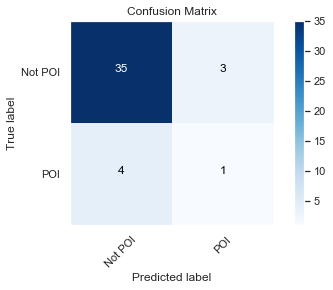

Number of True Positives:  1


In [124]:
clf = DecisionTreeClassifier()
'''
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
'''
model_response(clf)

### Model 2 - ExtraTreesClassifier

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

Score:  0.8604651162790697
Test Set:  {0.0: 40, 1.0: 3}
POIs in Test Set:  3
Precision:  0.3333333333333333
Recall:  0.2
Confusion matrix, without normalization


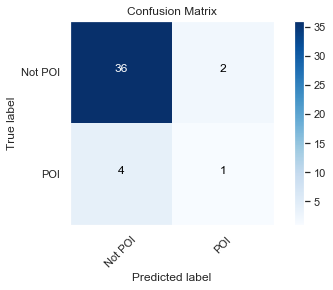

Number of True Positives:  1


In [128]:
clf = ExtraTreesClassifier()
# clf = ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.6000000000000001, min_samples_leaf=1, min_samples_split=8, n_estimators=100)

model_response(clf)

### Model 3 - StackingEstimator & GradientBoostingClassifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

Score:  0.9069767441860465
Test Set:  {0.0: 42, 1.0: 1}
POIs in Test Set:  1
Precision:  1.0
Recall:  0.2
Confusion matrix, without normalization


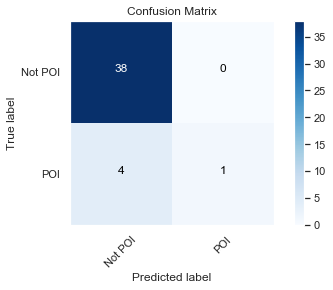

Number of True Positives:  1


In [133]:
clf = make_pipeline(
    StackingEstimator(estimator=LogisticRegression(C=1.0, dual=False, penalty="l2")),
    GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.6000000000000001)
)

model_response(clf)

### Model 4 - DecisionTreeClassifier

Score:  0.813953488372093
Test Set:  {0.0: 38, 1.0: 5}
POIs in Test Set:  5
Precision:  0.2
Recall:  0.2
Confusion matrix, without normalization


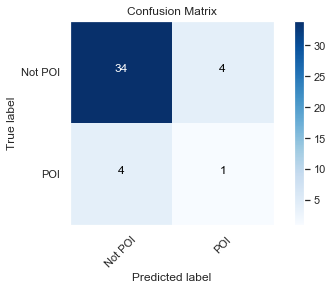

Number of True Positives:  1


In [134]:
dt = DecisionTreeClassifier()
param_grid = {}
clf = GridSearchCV(dt, param_grid)

model_response(clf)

### Model 5 - Logistic Regression

Score:  0.9069767441860465
Test Set:  {0.0: 42, 1.0: 1}
POIs in Test Set:  1
Precision:  1.0
Recall:  0.2
Confusion matrix, without normalization


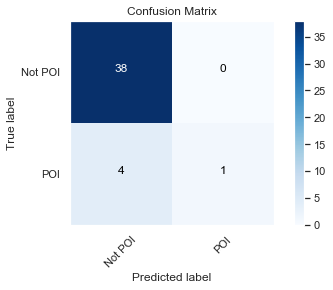

Number of True Positives:  1


In [135]:
clf = LogisticRegression()

model_response(clf)

### Model 6 - KMeans

Score:  -7.3834157335003985
Test Set:  {0: 42, 1: 1}
POIs in Test Set:  1
Precision:  1.0
Recall:  0.2
Confusion matrix, without normalization


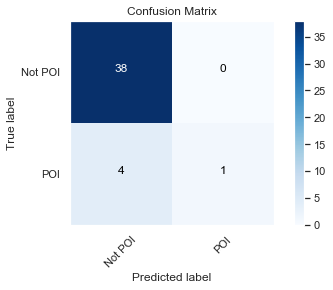

Number of True Positives:  1


In [136]:
clf = KMeans(n_clusters=2, tol=0.001)

model_response(clf)

### Model 7 - Naive-Bayes Gaussian

Score:  0.8604651162790697
Test Set:  {0.0: 38, 1.0: 5}
POIs in Test Set:  5
Precision:  0.4
Recall:  0.4
Confusion matrix, without normalization


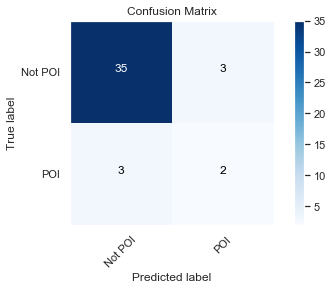

Number of True Positives:  2


In [137]:
clf = GaussianNB()

model_response(clf)

# TPOT

* https://epistasislab.github.io/tpot/
* https://github.com/EpistasisLab/tpot

In [44]:
from tpot import TPOTRegressor
from tpot import TPOTClassifier

### TPOT Test 1

In [45]:
X_train = features_train
X_test = features_test
y_train = labels_train
y_test = labels_test

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.8707518796992482


Generation 2 - Current best internal CV score: 0.8717543859649123


Generation 3 - Current best internal CV score: 0.8802756892230577


Generation 4 - Current best internal CV score: 0.8922807017543859


Generation 5 - Current best internal CV score: 0.8922807017543859



Best pipeline: LogisticRegression(input_matrix, C=15.0, dual=True, penalty=l2)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=5, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=20, periodic_checkpoint_folder=None,
        population_size=20, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [46]:
# print(tpot.score(X_test, y_test))

In [47]:
tpot.export('tpot_mnist_pipeline.py')

True

### TPOT Test 1 Manual Implementation Test (a)

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

Score:  0.8837209302325582
Test Set:  {0.0: 41, 1.0: 2}
POIs in Test Set:  2
Precision:  0.5
Recall:  0.2
Confusion matrix, without normalization


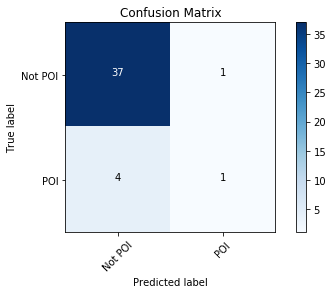

Number of True Positives:  1


In [49]:
# Score on the training set was:0.8696969696969697
clf = ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.6000000000000001, min_samples_leaf=1, min_samples_split=8, n_estimators=100)

model_response(clf)

### TPOT Test 2

In [50]:
X_train = features_train
X_test = features_test
y_train = labels_train
y_test = labels_test

In [51]:
pipeline_optimizer = TPOTClassifier()

In [52]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=50, cv=5, random_state=42, verbosity=2)

In [53]:
pipeline_optimizer.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.8922807017543859


Generation 2 - Current best internal CV score: 0.9028070175438596


Generation 3 - Current best internal CV score: 0.9028070175438596


Generation 4 - Current best internal CV score: 0.9028070175438596


Generation 5 - Current best internal CV score: 0.9028070175438596



Best pipeline: LogisticRegression(Normalizer(input_matrix, norm=l1), C=10.0, dual=False, penalty=l1)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=5, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=50, periodic_checkpoint_folder=None,
        population_size=50, random_state=42, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [54]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

True

### TPOT Test 2 Manual Implementation Test

Score:  0.8604651162790697
Test Set:  {0.0: 40, 1.0: 3}
POIs in Test Set:  3
Precision:  0.3333333333333333
Recall:  0.2
Confusion matrix, without normalization


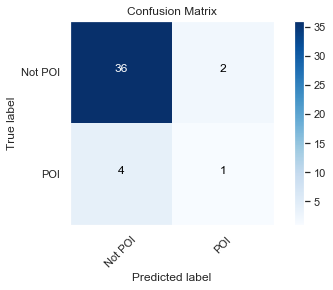

Number of True Positives:  1


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Score on the training set was:0.8688311688311687
clf = make_pipeline(Normalizer(norm="l1"), LogisticRegression(C=10.0, dual=False, penalty="l1"))


model_response(clf)

### Correlation Matrix to detect collinear features following feature engineering

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
import seaborn as sns
sns.set()

In [58]:
sns.set(style="dark")

In [59]:
corr = df.corr()

In [60]:
mask = np.zeros_like(corr, dtype=np.bool)

In [61]:
mask[np.triu_indices_from(mask)] = True

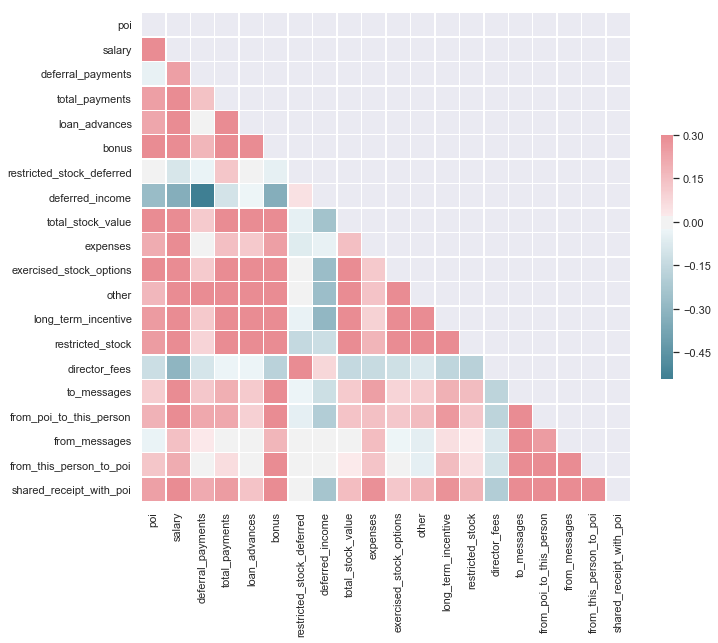

In [62]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Resources

In [63]:
resources = pd.read_csv('resources.csv')

In [64]:
resources

,title,author,url
0,An Introduction to Feature Selection,Jason Brownlee,https://machinelearningmastery.com/an-introduc...
1,A Feature Selection Tool for Machine Learning ...,William Koehrsen,https://towardsdatascience.com/a-feature-selec...
2,Machine Learning with Scikit-Learn - 42 - Auto...,Cristi Vlad,https://www.youtube.com/watch?v=RXFnwCRb-is
3,scikit-learn v0.19.2 Section 1.13 Feature Sele...,NaN,http://scikit-learn.org/stable/modules/feature...
4,The Ultimate Python Seaborn Tutorial,NaN,https://elitedatascience.com/python-seaborn-tu...
5,Plotting a diagonal correlation matrix,Michael Waskom,https://seaborn.pydata.org/examples/many_pairw...
6,Visualization with Seaborn,Jake VanderPlas,https://jakevdp.github.io/PythonDataScienceHan...


In [65]:
resources.iloc[1][2]

'https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0'